In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = sm.datasets.co2.load_pandas()
y = data.data

In [3]:
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01    313.425000
1958-11-01    313.425000
1958-12-01    314.700000
1959-01-01    315.500000
1959-02-01    316.700000
1959-03-01    316.733333
1959-04-01    317.675000
1959-05-01    318.325000
1959-06-01    318.025000
1959-07-01    316.525000
1959-08-01    314.900000
1959-09-01    313.825000
1959-10-01    313.400000
1959-11-01    314.875000
1959-12-01    315.525000
1960-01-01    316.380000
1960-02-01    316.975000
1960-03-01    317.575000
1960-04-01    319.120000
1960-05-01    319.925000
1960-06-01    319.450000
1960-07-01    318.060000
1960-08-01    315.775000
                 ...    
1999-07-01    369.000000
1999-08-01    366.700000
1999-09-01    364.675000
1999-10-01    365.140000
1999-11-01    366.650000
1999-12-01    367.900000
2000-01-01    369.020000
2000-02-01    369.375000
2000-03-01    370.400000


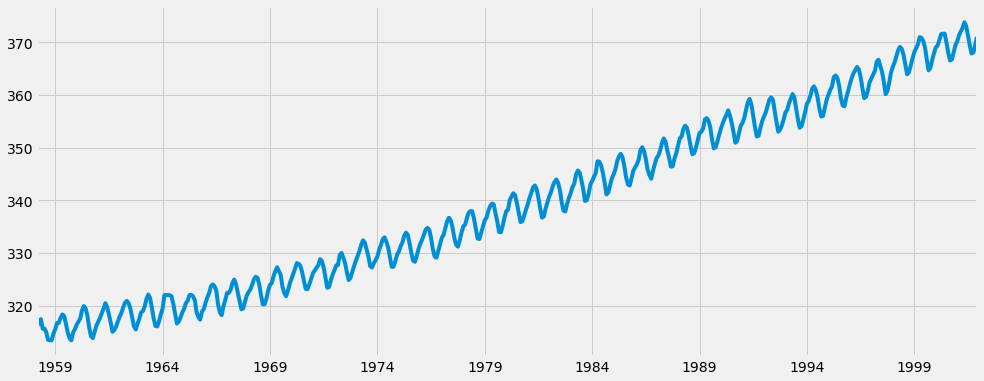

In [4]:
y.plot(figsize=(15, 6))
plt.show()

In [5]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [6]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624030462
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727641159
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320026
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.287842785377
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578978072075
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912937587
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.04875494035
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662328003615
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941066979707
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716809398
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1088.7022304116076
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:780.43094114512
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893619993
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912986582647
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194062
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:337.79385497181556
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:619.9501759055394
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:376.9283759666373
ARI

In [7]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.442      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.162      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.812      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


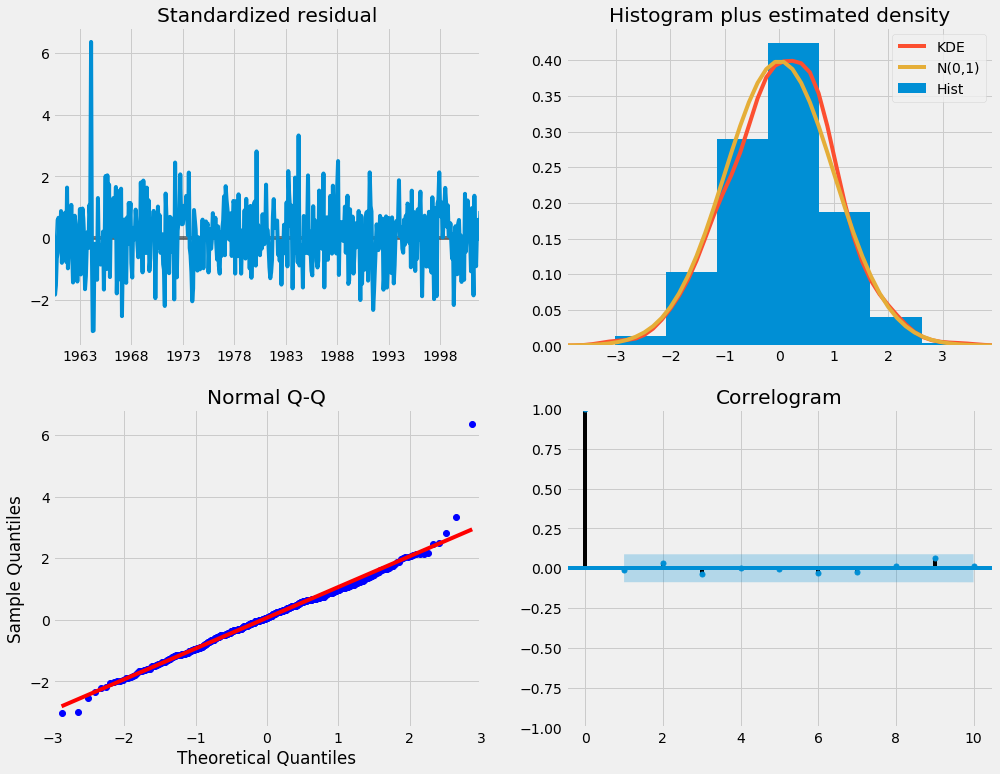

In [8]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [9]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

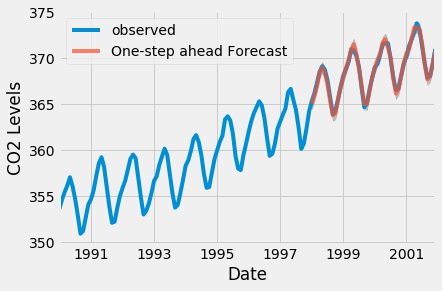

In [10]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [11]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [12]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

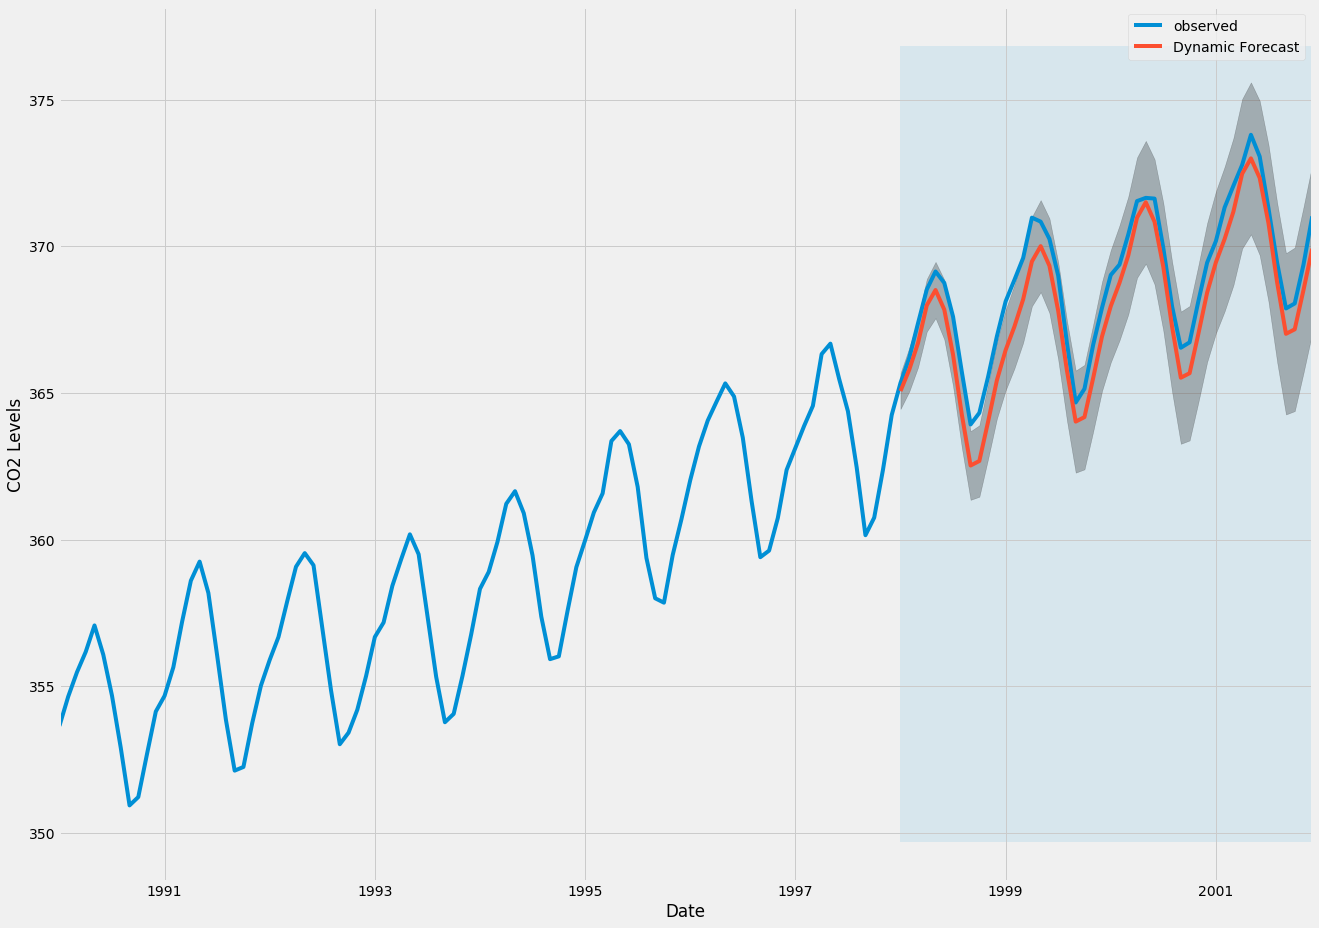

In [13]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [14]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


In [15]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

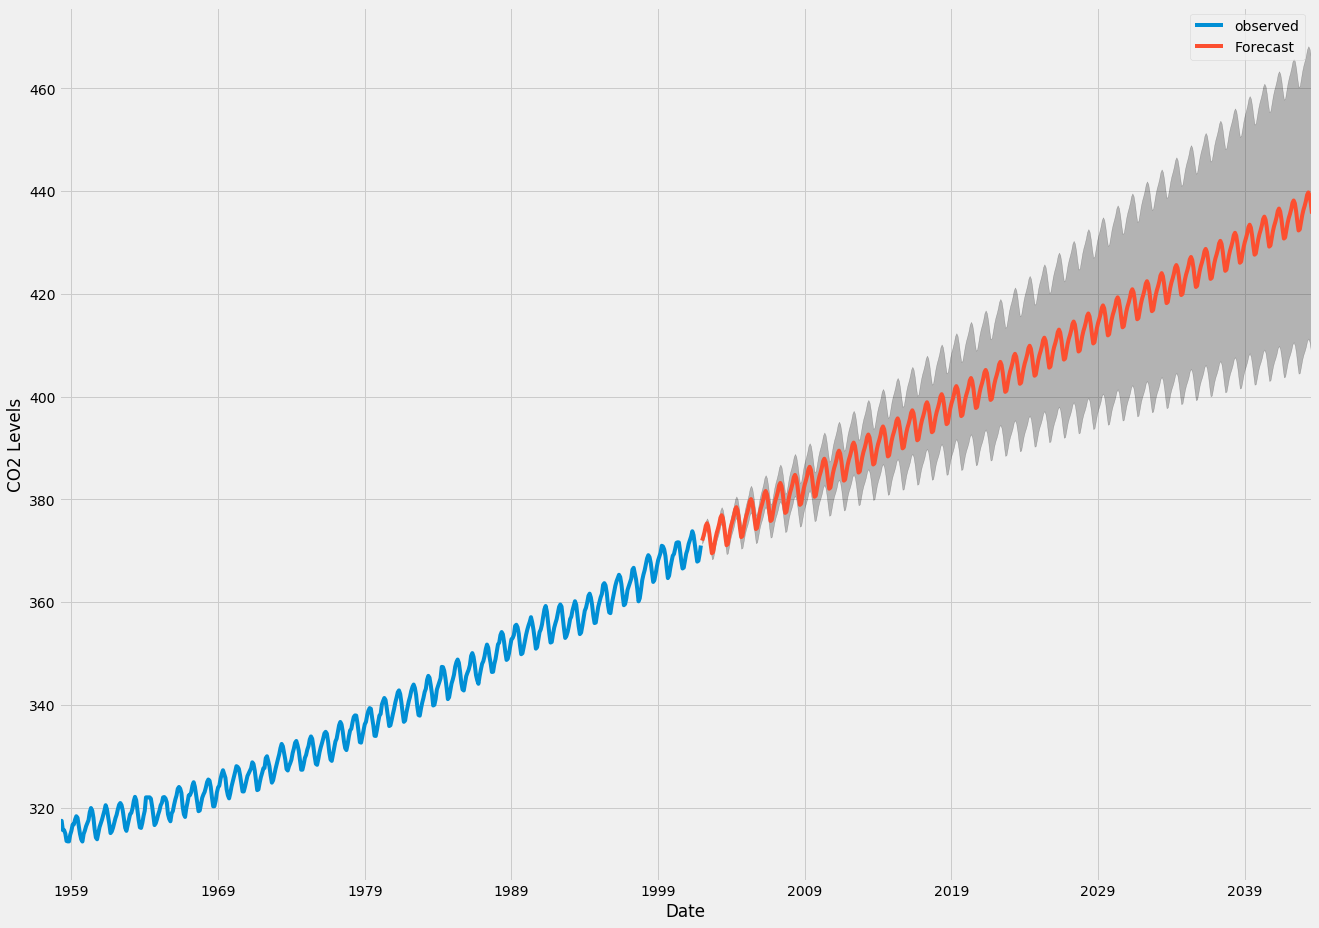

In [16]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [17]:
import seaborn as sns
%matplotlib inline

In [24]:
train = pd.read_csv('data/train_clean.csv')

train = train.loc[1:1000, :]

bill_amt_cols = ['BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP', 'BILL_AMT_OCT', 'BILL_AMT_NOV', 'BILL_AMT_DEC']

In [25]:
def get_ar_order(ex):    
    bill_series = ex.loc[bill_amt_cols]
    mod = sm.tsa.AR(pd.TimeSeries(bill_series.values.squeeze().astype('float32')), dates=[1, 2, 3, 4, 5, 6])
    aics = [mod.fit(i).aic for i in range(5)]
    
    return aics.index(min(aics))

In [26]:
train['AR_ORDER'] = train.apply(get_ar_order, axis=1)

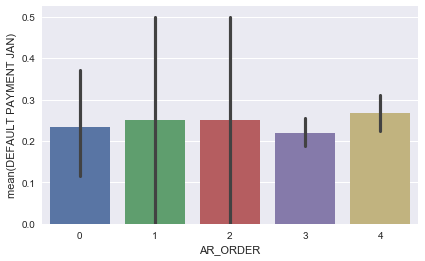

In [27]:
sns.barplot(x = 'AR_ORDER', y='DEFAULT PAYMENT JAN', data=train)

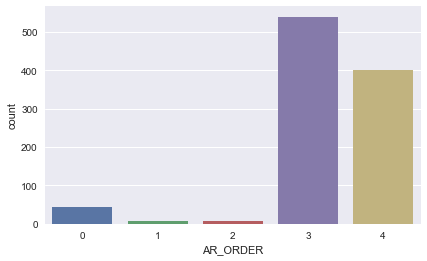

In [28]:
sns.countplot(x='AR_ORDER', data=train)

In [29]:
samples = train.sample(100)[bill_amt_cols]

In [30]:
ts = pd.TimeSeries(samples.sample().values.squeeze())

In [31]:
ts

0    122.027065
1    103.840769
2    159.234438
3    191.134990
4    245.604437
5    312.983173
dtype: float64

In [32]:
model = sm.tsa.AR(ts, dates=[1, 2, 3, 4, 5, 6])

In [33]:
ret = model.fit(0)

In [34]:
ret.aic

9.223202089320381

In [35]:
ret2 = model.fit(1)

In [36]:
ret2.aic

7.6807732545324017

In [37]:
ret3 = model.fit(2)

In [38]:
ret3.aic

3.4588857684116148

In [39]:
ret4 = model.fit(3)

In [40]:
ret4.aic

-51.970728522452077

In [41]:
ret5 = model.fit(4)

In [42]:
ret5.aic

-53.492874492498913

In [43]:
ret.params

const    189.137478
L1.y     189.137478
L2.y     189.137478
L3.y     189.137478
L4.y     189.137478
dtype: float64

In [82]:
def gen_ar_func(ts_columns, max_order = 5):
    def fit_ar_process(data):
        ts = data.loc[ts_columns].squeeze()
        mod = sm.tsa.AR(pd.TimeSeries(ts.values.squeeze().astype('float32')), dates=[i for i in range(6)])
        rets = [mod.fit(i) for i in range(max_order)]
        
        # get best one using bic
        
        min_index = rets.index(min([x.bic for x in rets]))
        best_model = rets[min_index]
        
        data['AR_ORD'] = len(best_model.params) - 1
        for k,v in best_model.params.iteritems():
            data[k] = v

        return data
    return fit_ar_process

In [69]:
x = train.sample()[bill_amt_cols].squeeze()

In [71]:
ts = pd.TimeSeries(x.values.squeeze().astype('float32'))

In [74]:
mod = sm.tsa.AR(ts, dates=[1, 2, 3, 4, 5, 6])

In [79]:
mod.fit(3)

In [81]:
len(x)

6

In [83]:
train = train.apply(f1, axis=1)

ValueError: ('shapes (2,5) and (1,) not aligned: 5 (dim 1) != 1 (dim 0)', 'occurred at index 1')

9.1537885790630664

In [443]:
samples = train.sample(1000)

In [444]:
samples = samples.apply(get_arma_order, axis=1)

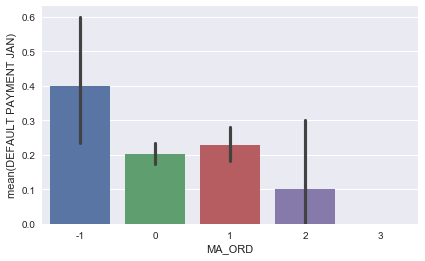

In [445]:
sns.barplot(x = 'MA_ORD', y = 'DEFAULT PAYMENT JAN', data=samples)

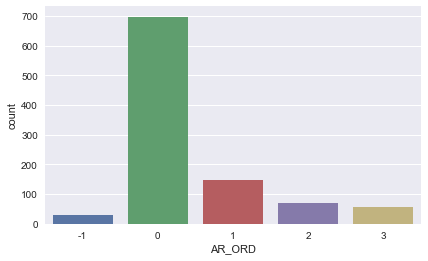

In [446]:
sns.countplot(x = 'AR_ORD',  data=samples)

In [447]:
from sklearn.ensemble import RandomForestClassifier

In [455]:
rf = RandomForestClassifier(n_estimators=300)

In [456]:
train = samples

In [458]:
train = train.drop(['CUST_COD'], axis=1)

train['SEX_MISSING'] = train['SEX'].isnull()*1      # Add a column to say if sex was missing or not
train.loc[train['SEX'].isnull(), 'SEX'] = 'F' # Predict sex with majority class
train['SEX'] = train['SEX'].apply(lambda x : 0 if x == 'M' else 1)   # Convert to M -> 0, F -> 1

train['EDUCATION_MISSING'] = train['EDUCATION'].isnull() * 1 # Add a column to say if education was missing or not
train['EDUCATION'] = train['EDUCATION'].fillna('other')    # Predict missing values as other
train = pd.get_dummies(train, columns=['EDUCATION'])   # Get one hot vector for education

train['MARRIAGE_MISSING'] = train['MARRIAGE'].isnull() * 1 # Add a column to say if education was missing or not
train['MARRIAGE'] = train['MARRIAGE'].fillna('other')    # Predict missing values as other
train = pd.get_dummies(train, columns=['MARRIAGE'])   # Get one hot vector for education

train['AGE_MISSING'] = train['BIRTH_DATE'].isnull() * 1


import datetime

birthdates = train['BIRTH_DATE']

def get_age(date):
    try:
        return (datetime.datetime.today() - datetime.datetime.strptime(date, '%d/%m/%Y')).days//365
    except Exception as e:
        return date

birthdates = birthdates.apply(get_age)

birthdates = birthdates.fillna(36)
train['AGE'] = birthdates
train = train.drop(['BIRTH_DATE'], axis=1)

train = train.astype('float64')

In [459]:
pay_cols = ['PAY_JUL', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']

def avg_payments(columns):
    def ret(x):
        retval = 0
        for c in columns:
            retval += x[c]
        return retval / len(columns)
    return ret

for i in range(-2, -7, -1):
    train['AVG_PAY_LAST_{0}'.format(-1*i)] = train.apply(avg_payments(pay_cols[i:]), axis=1)
    
def get_trend(y):
    N = len(y)
    x = range(N)
    B = (sum(x[i] * y[i] for i in range(N)) - 1./N*sum(x)*sum(y)) / (sum(x[i]**2 for i in range(N)) - 1./N*sum(x)**2)
    return B
    
def get_col_trend(cols):
    def get_cols(x):
        return get_trend([v for v in x.loc[cols]])
    return get_cols

train['PAY_TREND'] = train.apply(get_col_trend(pay_cols), axis=1)

bill_amt_cols = ['BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP', 'BILL_AMT_OCT', 'BILL_AMT_NOV', 'BILL_AMT_DEC']

for i in range(-2, -7, -1):
    train['AVG_BILL_AMT_LAST_{0}'.format(-1*i)] = train.apply(avg_payments(bill_amt_cols[i:]), axis=1)

train['BILL_AMT_TREND'] = train.apply(get_col_trend(bill_amt_cols), axis=1)

pay_amt_cols = ['PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEP', 'PAY_AMT_OCT', 'PAY_AMT_NOV', 'PAY_AMT_DEC']

for i in range(-2, -7, -1):
    train['AVG_PAY_AMT_LAST_{0}'.format(-1*i)] = train.apply(avg_payments(pay_amt_cols[i:]), axis=1)
train['PAY_AMT_TREND'] = train.apply(get_col_trend(pay_amt_cols), axis=1)

for i in range(1, 6):
    train['DELTA_{0}'.format(i)] = train.apply(lambda x : x.loc[bill_amt_cols[i]] - x.loc[bill_amt_cols[i-1]], axis=1)

train['PROD'] = train.apply(lambda x : x['PAY_AMT_TREND'] * x['BILL_AMT_TREND'], axis=1)

train['TOTAL_AMT_PAY'] = train['PAY_AMT_JUL'] + train['PAY_AMT_AUG'] + train['PAY_AMT_SEP'] + train['PAY_AMT_OCT'] + train['PAY_AMT_NOV'] + train['PAY_AMT_DEC']

In [461]:
for prev, succ in zip(bill_amt_cols, bill_amt_cols[1:]):
    train['BILL_DELTA_{0}'.format(prev[-3:])] = train.apply(lambda x: x[succ] - x[prev], axis=1)

X = train.drop(['DEFAULT PAYMENT JAN'], axis=1)
y = train['DEFAULT PAYMENT JAN']

In [468]:
from sklearn.model_selection import cross_val_score

In [471]:
scores = cross_val_score(rf, X, y, cv=10)

In [472]:
print(sum(scores) / len(scores))

0.808770877088


In [462]:
rf = rf.fit(X, y)

In [463]:
from sklearn.metrics import accuracy_score, f1_score

In [466]:
print(f1_score(rf.predict(X), y))

1.0


In [467]:
print(accuracy_score(rf.predict(X), y))

1.0


In [478]:
asdf = [(x,y) for x,y in zip(rf.feature_importances_, X.columns)]

In [481]:
asdf.sort(key=lambda x : x[0], reverse=True)

In [482]:
asdf

[(0.043016611465830114, 'PAY_DEC'),
 (0.038919711725607001, 'AVG_PAY_LAST_5'),
 (0.037427533734411884, 'AVG_PAY_LAST_3'),
 (0.036651044426177899, 'AVG_PAY_LAST_2'),
 (0.034950447191415407, 'AGE'),
 (0.032244810570453031, 'AVG_PAY_LAST_4'),
 (0.031398394793536087, 'AVG_PAY_LAST_6'),
 (0.028017410194776455, 'LIMIT_BAL'),
 (0.02190652093432811, 'PAY_TREND'),
 (0.020702558696068633, 'DELTA_2'),
 (0.019866973615010986, 'BILL_AMT_TREND'),
 (0.019497322390257189, 'AVG_PAY_AMT_LAST_6'),
 (0.018817906777020624, 'PAY_AMT_TREND'),
 (0.018652374352148622, 'BILL_DELTA_AUG'),
 (0.018408211162259627, 'PROD'),
 (0.018293089505981599, 'AVG_BILL_AMT_LAST_6'),
 (0.018147648427775057, 'DELTA_1'),
 (0.018088135886669823, 'TOTAL_AMT_PAY'),
 (0.017497478977158233, 'DELTA_5'),
 (0.017444507831996303, 'BILL_DELTA_JUL'),
 (0.017397483821824343, 'AVG_BILL_AMT_LAST_5'),
 (0.01721210742460343, 'BILL_DELTA_NOV'),
 (0.01714749880429265, 'AVG_PAY_AMT_LAST_5'),
 (0.017021475836897972, 'BILL_DELTA_SEP'),
 (0.0169928287

In [621]:
ts

0    3754.307394
1    3674.526200
2    -117.525211
3     407.939489
4     389.365616
5     728.316434
dtype: float64

In [622]:
from scipy.stats import skew, kurtosis

In [623]:
skew(ts)

0.6309620661626978

In [624]:
kurtosis(ts)

-1.4916814767755033

In [88]:
from sklearn.metrics import f1_score

In [90]:
grid = utils.ThresholdGridCV(utils.ThresholdRandomForest, {'threshold' : [0.1, 0.2, 0.3, 0.5, 0.8], 'random_state' : [42]}, metric = f1_score)

Object `instanceof` not found.
